<a href="https://colab.research.google.com/github/JiyaPatel22/-Anomaly-Detection-using-Teachable-Machine/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("retail_store_sales.csv")
print(df)
print(df.info())
# print(df.dtypes)
print(df.shape)
# print(df.sample())

      Transaction ID Customer ID       Category          Item  Price Per Unit  \
0        TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5   
1        TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0   
2        TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5   
3        TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5   
4        TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5   
...              ...         ...            ...           ...             ...   
12570    TXN_9347481     CUST_18     Patisserie   Item_23_PAT            38.0   
12571    TXN_4009414     CUST_03      Beverages    Item_2_BEV             6.5   
12572    TXN_5306010     CUST_11       Butchers    Item_7_BUT            14.0   
12573    TXN_5167298     CUST_04      Furniture    Item_7_FUR            14.0   
12574    TXN_2407494     CUST_23           Food   Item_9_FOOD            17.0   

       Quantity  Total Spen

In [ ]:
print(df.isnull().sum())

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['Category'].value_counts()

,count
Category,
Electric household essentials,1591
Furniture,1591
Food,1588
Milk Products,1584
Butchers,1568
Beverages,1567
Computers and electric accessories,1558
Patisserie,1528


In [ ]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [ ]:
df['Transaction Date'].head(10)

,Transaction Date
0,2024-04-08
1,2023-07-23
2,2022-10-05
3,2022-05-07
4,2022-10-02
5,2023-11-30
6,2023-06-10
7,2024-04-02
8,2023-04-26
9,2024-03-14


In [ ]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

/tmp/ipython-input-595308721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
/tmp/ipython-input-595308721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df['Category'] = df['Category'].str.strip().str.title()
df['Payment Method'] = df['Payment Method'].str.strip().str.lower()

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Quantity'] = pd.to_numeric(df['Quantity'])
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
df = df[df['Price Per Unit'] > 0]
df = df[df['Quantity'] > 0]

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,0
Quantity,0
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,0
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [ ]:
original_shape = df.shape
df.shape

(7579, 11)

In [ ]:
category_sales = df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
display(category_sales)

,Total Spent
Category,
Butchers,136146.5
Computers And Electric Accessories,126621.5
Beverages,124513.0
Electric Household Essentials,124381.5
Food,122434.5
Furniture,120756.5
Patisserie,117121.0
Milk Products,116538.5


This table shows the total sales for each product category, sorted from highest to lowest. It provides a clear overview of the performance of different product categories in terms of revenue generated.

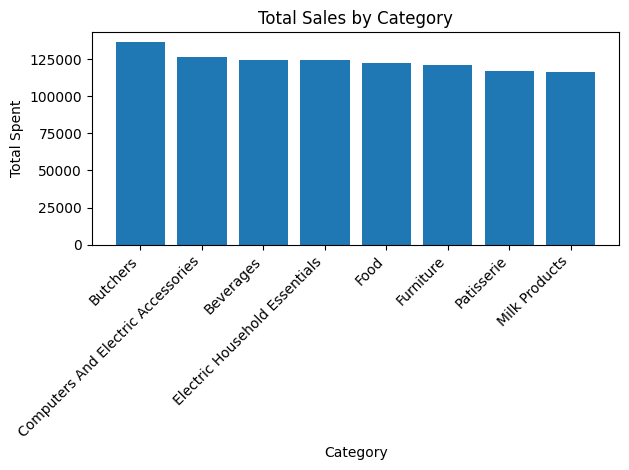

In [ ]:
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.title('Total Sales by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("E:\retail_cleaned.csv", index=False)